## Assignment 3_Non-linear Regression

In [2]:
## 1. Download and read the data file

In [27]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from matplotlib import pyplot as plt

In [5]:
coupon = pd.read_excel("http://byungwan.com/class/Coupon_Assignment3.xlsx")
coupon.head()

,Gender,Age,CClass,Discount,Visits,Email,SMS,MStatus,Purchases,Sales
0,1,23,2,0,2,1,1,0,1,0.53
1,0,26,2,0,1,0,0,0,1,0.35
2,0,20,1,0,1,0,0,0,0,0.00
3,1,22,1,0,0,0,1,0,0,0.00
4,0,18,2,0,5,0,1,0,1,0.48


In [6]:
## 2. Use a non-linear model and show the relationship between "Discount" and other variables

In [12]:
y = coupon.iloc[: , 3] # Discount
y

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    1
Name: Discount, Length: 1000, dtype: int64

In [13]:
x = coupon.iloc[:, coupon.columns != 'Discount']
x

,Gender,Age,CClass,Visits,Email,SMS,MStatus,Purchases,Sales
0,1,23,2,2,1,1,0,1,0.530
1,0,26,2,1,0,0,0,1,0.350
2,0,20,1,1,0,0,0,0,0.000
3,1,22,1,0,0,1,0,0,0.000
4,0,18,2,5,0,1,0,1,0.480
...,...,...,...,...,...,...,...,...,...
995,1,24,2,2,0,1,0,1,0.420
996,0,20,1,2,0,0,0,0,0.000
997,0,22,2,4,0,0,0,1,0.370
998,0,27,1,0,0,0,0,0,0.000


In [14]:
x_c = sm.add_constant(x)

In [15]:
logit1 = sm.Logit(y, x_c).fit()
print(logit1.summary())

Optimization terminated successfully.
         Current function value: 0.449559
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Discount   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      990
Method:                           MLE   Df Model:                            9
Date:                Tue, 28 Oct 2025   Pseudo R-squ.:                  0.2155
Time:                        12:08:35   Log-Likelihood:                -449.56
converged:                       True   LL-Null:                       -573.06
Covariance Type:            nonrobust   LLR p-value:                 4.296e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.4850      0.822     -9.111      0.000      -9.095      -5.875
Gender         0.1304      0.

In [22]:
vif_factors = [vif(x.values, i) for i in range(0, x.shape[1])]
pd.DataFrame({"Variable": x.columns, "VIF Factor": vif_factors})

,Variable,VIF Factor
0,Gender,1.484718
1,Age,9.902195
2,CClass,11.178586
3,Visits,2.723271
4,Email,1.322529
5,SMS,1.486134
6,MStatus,1.355874
7,Purchases,8.460973
8,Sales,7.631144


In [25]:
# Most variables had VIF values below 10, but "CClass" showed a value slightly above 10 
# since it is slightly above 10, it will not be removed

In [16]:
logit.params

const       -7.485046
Gender       0.130425
Age         -0.015757
CClass       3.835081
Visits      -0.033081
Email       -0.070984
SMS          0.005167
MStatus      0.371128
Purchases    0.565109
Sales       -1.658461
dtype: float64

In [19]:
np.exp(logit1.params)

const         0.000561
Gender        1.139313
Age           0.984367
CClass       46.297194
Visits        0.967460
Email         0.931477
SMS           1.005180
MStatus       1.449369
Purchases     1.759639
Sales         0.190432
dtype: float64

## Interpretation

Among the independent variables, CClass (class of the member), Visits (number of visits), Purchases (number of purchases), and Sales (sales amount) were statistically significant as the p-value was less than 0.05, indicating that these variables have a statistically meaningful relationship with the likelihood of using a discount.

1) CClass
The CClass has a low p-value < 0.001, exp(B) = 46.29
- Customers with higher membership levels are significantly more likely to use coupons.
Specifically, the odds of using a coupon increase by about 46 times for each higher membership level showing that premium members are more responsive to discount offers.

2) Visits
The Visits has a low p-value (0.036), exp(B) = 0.967
- As the coefficient is negative and the exp(B) is lower than 1, we can interpret that the customers who visit the store more frequently are less likely to use coupons. Each additional visit decreases the odds of using a coupon by about 3.3%. It might mean that more frequent visitors are less dependent on discounts or they might not have enough coupons to every visit they make.

3) Purchases
Purchases also has a low p-value with exp(B) = 1.76
- It clearly shows that each additional purchase increases the odds of using a coupon by 76%, implying that more active shoppers are more likely to take advantage of discounts.

4) Sales
Finally, Sales has a low p-value with exp(B) = 0.19
- Customers with higher total spending are significantly less likely to use coupons as one-unit increase in sales reduces the odds of coupon usage by almost about 81%.

Overall, membership class, visit frequency, purchase frequency and total sales are statistically significant of coupon usage while other variables such as Gender, Age, Email, SMS, and MStatus are statistically insignificant.

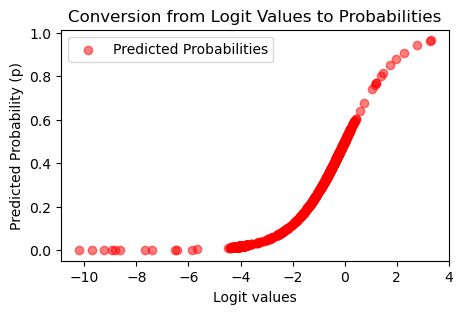

In [38]:
# logit - fittedvalues
logit_vals = logit1.fittedvalues

# probability values
prob_vals = 1 / (1 + np.exp(-logit_vals))

# plot 
plt.figure(figsize=(5,3))
plt.scatter(logit_vals, prob_vals, alpha=0.5, color='red', label='Predicted Probabilities')
plt.xlabel("Logit values")
plt.ylabel("Predicted Probability (p)")
plt.title("Conversion from Logit Values to Probabilities")

plt.legend()
plt.show()